<a href="https://colab.research.google.com/github/DineshSiddhartha/SAI_A5/blob/main/SAI_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/test.zip

Archive:  /content/test.zip
   creating: cats/
  inflating: cats/cat_190.jpg        
  inflating: __MACOSX/cats/._cat_190.jpg  
  inflating: cats/cat_147.jpg        
  inflating: __MACOSX/cats/._cat_147.jpg  
  inflating: cats/cat_542.jpg        
  inflating: __MACOSX/cats/._cat_542.jpg  
  inflating: cats/cat_595.jpg        
  inflating: __MACOSX/cats/._cat_595.jpg  
  inflating: cats/cat_422.jpg        
  inflating: __MACOSX/cats/._cat_422.jpg  
  inflating: cats/cat_583.jpg        
  inflating: __MACOSX/cats/._cat_583.jpg  
  inflating: cats/cat_384.jpg        
  inflating: __MACOSX/cats/._cat_384.jpg  
  inflating: cats/cat_586.jpg        
  inflating: __MACOSX/cats/._cat_586.jpg  
  inflating: cats/cat_545.jpg        
  inflating: __MACOSX/cats/._cat_545.jpg  
  inflating: cats/cat_223.jpg        
  inflating: __MACOSX/cats/._cat_223.jpg  
  inflating: cats/cat_551.jpg        
  inflating: __MACOSX/cats/._cat_551.jpg  
  inflating: cats/cat_587.jpg        
  inflating: __MACOSX/ca

In [ ]:
#data import
import os
Y_dogs=[]
for i in range(70):
  Y_dogs.append(1)
Y_cats=[]
for i in range(70):
  Y_cats.append(0)
source_dir = "/content/cats"
cat_imgs = os.listdir(source_dir)
source_dir = "/content/dogs"
dog_imgs = os.listdir(source_dir)


In [ ]:
base_path = "/content/cats/"
cat_imgs = [base_path + filename for filename in cat_imgs]
base_path = "/content/dogs/"
dog_imgs = [base_path + filename for filename in dog_imgs]


In [ ]:
print(len(cat_imgs))
print(len(dog_imgs))

70
70


In [ ]:
from sklearn.model_selection import train_test_split
X_train_cat,X_test_cat,y_train_cat,y_test_cat=train_test_split(cat_imgs,Y_cats,test_size=0.2)
X_train_dog,X_test_dog,y_train_dog,y_test_dog=train_test_split(dog_imgs,Y_dogs,test_size=0.2)

In [ ]:
print(len(X_train_cat))
print(len(y_train_cat))
print(len(X_test_cat))
print(len(y_test_cat))

56
56
14
14


In [ ]:
print(len(X_train_dog))
print(len(y_train_dog))
print(len(X_test_dog))
print(len(y_test_dog))

56
56
14
14


In [ ]:
#installing augly
pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 87.8 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=307e4d1d01b1bd7c3262226caf8d49cf7108d263b11b589b5f2093a4bc844152
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


In [ ]:
!pip install --upgrade augly -q

In [ ]:
import augly.image as imaugs
from PIL import Image
# augmentation functions
def augmentor1(img_folder,img_file_names):
  augmented_img_paths = []

  for file_name in img_file_names:
    image = Image.open(file_name)
    augmented_image = imaugs.rotate(image, degrees=90)
    augmented_image = imaugs.color_jitter(augmented_image,brightness_factor=0.2, contrast_factor=0.2, saturation_factor=0.2)
    augmented_image = imaugs.brightness(augmented_image,factor=1.5)
    augmented_image = imaugs.grayscale(augmented_image)
    augmented_image_path = os.path.join(img_folder, f"aug1_{os.path.basename(file_name)}")
    augmented_image.save(augmented_image_path)
    augmented_img_paths.append(augmented_image_path)
  return augmented_img_paths

In [ ]:
def augmentor2(img_folder,img_file_names):
  augmented_img_paths = []

  for file_name in img_file_names:
    image = Image.open(file_name)
    augmented_image = imaugs.hflip(image)
    augmented_image = imaugs.pad(augmented_image)
    augmented_image = imaugs.pixelization(augmented_image,ratio=0.8)
    augmented_image = imaugs.random_noise(augmented_image)
    augmented_image_path = os.path.join(img_folder, f"aug2_{os.path.basename(file_name)}")
    augmented_image.save(augmented_image_path)
    augmented_img_paths.append(augmented_image_path)
  return augmented_img_paths

Augmenting images

In [ ]:
X_train_cat1=augmentor1("/content/cats/",X_train_cat)

In [ ]:
X_train_cat2=augmentor2("/content/cats/",X_train_cat)

In [ ]:
X_train_dog1=augmentor1("/content/dogs/",X_train_dog)

In [ ]:
X_train_dog2=augmentor2("/content/dogs/",X_train_dog)

In [ ]:
X_train_aug = X_train_cat + X_train_cat1 + X_train_cat2 + X_train_dog + X_train_dog1 + X_train_dog2
y_train_aug = y_train_cat + y_train_cat + y_train_cat + y_train_dog + y_train_dog + y_train_dog

In [ ]:
X_test_aug = X_test_cat + X_test_dog
y_test_aug = y_test_cat + y_test_dog

In [ ]:
print(len(X_train_aug))
print(len(y_train_aug))
print(len(X_test_aug))
print(len(y_test_aug))

336
336
28
28


Shuffling the dataset

In [ ]:
import random

combined = list(zip(X_train_aug, y_train_aug))

# Shuffling the combined list
random.shuffle(combined)

X_train_aug, y_train_aug = zip(*combined)

X_train_aug = list(X_train_aug)
y_train_aug = list(y_train_aug)

In [ ]:
import random

combined = list(zip(X_test_aug, y_test_aug))

# Shuffling the combined list
random.shuffle(combined)

X_test_aug, y_test_aug = zip(*combined)

X_test_aug = list(X_test_aug)
y_test_aug = list(y_test_aug)

In [ ]:
!pip install transformers timm  # Installing necessary packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
X_train_no_aug=X_train_cat + X_train_dog
y_train_no_aug=y_train_cat + y_train_dog

X_test_no_aug=X_test_cat + X_test_dog
y_test_no_aug=y_test_cat + y_test_dog

In [ ]:
import random

combined = list(zip(X_train_no_aug, y_train_no_aug))

# Shuffling the combined list
random.shuffle(combined)

X_train_no_aug, y_train_no_aug = zip(*combined)

X_train_no_aug = list(X_train_no_aug)
y_train_no_aug = list(y_train_no_aug)

In [ ]:
import random

combined = list(zip(X_test_no_aug, y_test_no_aug))

# Shuffling the combined list
random.shuffle(combined)

X_test_no_aug, y_test_no_aug = zip(*combined)

X_test_no_aug = list(X_test_no_aug)
y_test_no_aug = list(y_test_no_aug)

In [ ]:
# Installing required libraries
!pip install transformers datasets torch torchvision Pillow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Importing libraries
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import ResNetForImageClassification
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

np.random.seed(42)
# Defining a custom dataset class
class CustomImageDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Ensure 3 channels
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Defining transforms
pre_processing = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Loading the dataset
train_dataset_no_aug = CustomImageDataset(X_train_no_aug, y_train_no_aug, transform=pre_processing)
test_dataset_no_aug = CustomImageDataset(X_test_no_aug, y_test_no_aug, transform=pre_processing)
train_dataset_aug = CustomImageDataset(X_train_aug, y_train_aug, transform=pre_processing)
test_dataset_aug = CustomImageDataset(X_test_aug, y_test_aug, transform=pre_processing)

# Creating data loaders
batch_size = 32
train_loader_no_aug = DataLoader(train_dataset_no_aug, batch_size=batch_size, shuffle=True)
test_loader_no_aug = DataLoader(test_dataset_no_aug, batch_size=batch_size, shuffle=False)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=batch_size, shuffle=True)
test_loader_aug = DataLoader(test_dataset_aug, batch_size=batch_size, shuffle=False)

# Loading the ResNet-50 model from Hugging Face
model_no_aug = ResNetForImageClassification.from_pretrained(
    "microsoft/resnet-50",
    num_labels=len(set(y_train_no_aug)),
    ignore_mismatched_sizes=True,
)

model_aug = ResNetForImageClassification.from_pretrained(
    "microsoft/resnet-50",
    num_labels=len(set(y_train_aug)),
    ignore_mismatched_sizes=True,
    )

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_no_aug.to(device)
model_aug.to(device)

def reset_weights(m):
    if hasattr(m, "reset_parameters"):
        m.reset_parameters()

model_no_aug.apply(reset_weights)
model_aug.apply(reset_weights)

# Defining loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer_no_aug = torch.optim.Adam(model_no_aug.parameters(), lr=1e-4)
optimizer_aug = torch.optim.Adam(model_aug.parameters(), lr=1e-4)

# Training function
def train_model(model, train_loader, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Training model without augmentation
print("Training model without augmentation...")
train_model(model_no_aug, train_loader_no_aug, optimizer_no_aug)

# Training model with augmentation
print("Training model with augmentation...")
train_model(model_aug, train_loader_aug, optimizer_aug)

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    accuracy = accuracy_score(y_true, y_pred)
    return precision, recall, f1, accuracy

# Evaluating models
print("Evaluating model without augmentation...")
precision_no_aug, recall_no_aug, f1_no_aug, accuracy_no_aug = evaluate_model(model_no_aug, test_loader_no_aug)
print(f"Precision: {precision_no_aug:.4f}, Recall: {recall_no_aug:.4f}, F1: {f1_no_aug:.4f}, Accuracy: {accuracy_no_aug:.4f}")

print("Evaluating model with augmentation...")
precision_aug, recall_aug, f1_aug, accuracy_aug = evaluate_model(model_aug, test_loader_aug)
print(f"Precision: {precision_aug:.4f}, Recall: {recall_aug:.4f}, F1: {f1_aug:.4f}, Accuracy: {accuracy_aug:.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-

Training model without augmentation...
Epoch [1/5], Loss: 0.8549
Epoch [2/5], Loss: 0.6868
Epoch [3/5], Loss: 0.6352
Epoch [4/5], Loss: 0.5865
Epoch [5/5], Loss: 0.5153
Training model with augmentation...
Epoch [1/5], Loss: 0.8611
Epoch [2/5], Loss: 0.7116
Epoch [3/5], Loss: 0.6836
Epoch [4/5], Loss: 0.6394
Epoch [5/5], Loss: 0.6357
Evaluating model without augmentation...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.2500, Recall: 0.5000, F1: 0.3333, Accuracy: 0.5000
Evaluating model with augmentation...
Precision: 0.7381, Recall: 0.6786, F1: 0.6571, Accuracy: 0.6786


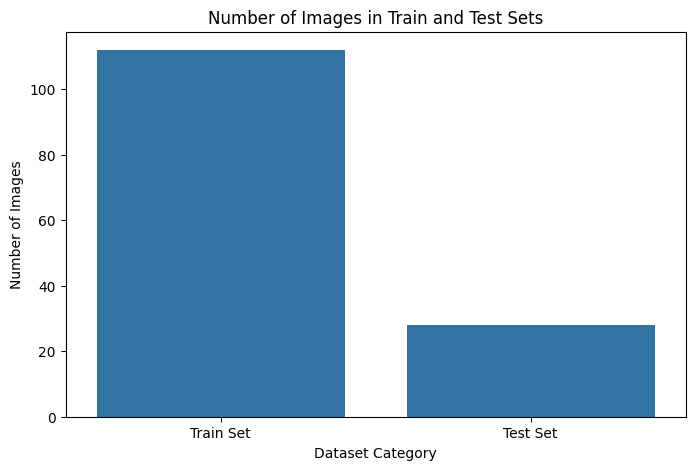

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for bar plot
categories = ['Train Set', 'Test Set']
train_counts = [len(X_train_no_aug), len(X_test_no_aug)]

df = pd.DataFrame({
    'Category': categories,
    'Count': train_counts
})

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=df)
plt.xlabel('Dataset Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Train and Test Sets')
plt.show()


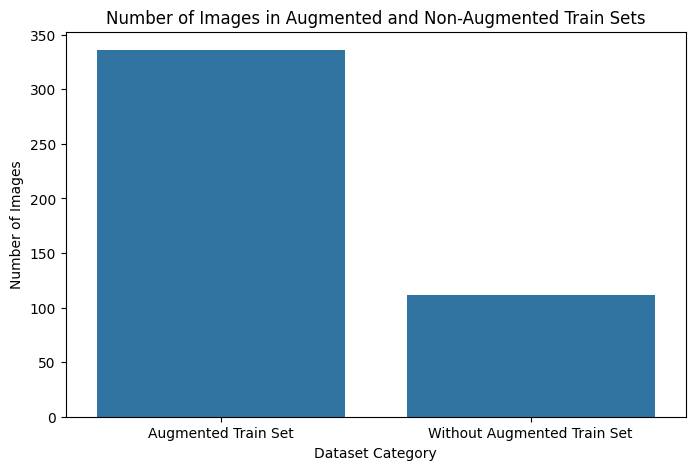

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for bar plot
categories = ['Augmented Train Set', 'Without Augmented Train Set']
train_counts = [len(X_train_aug), len(X_train_no_aug)]  # Ensure X_train_aug and X_train_no_aug are defined

df = pd.DataFrame({
    'Category': categories,
    'Count': train_counts
})

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=df)
plt.xlabel('Dataset Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Augmented and Non-Augmented Train Sets')
plt.show()


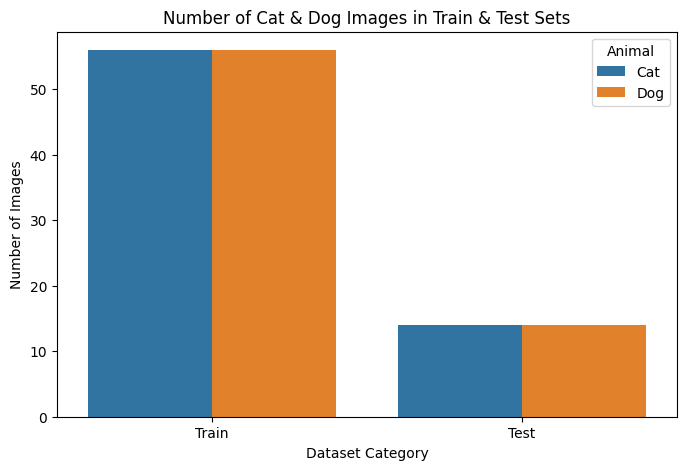

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for bar plot
categories = ['Train', 'Test']
cat_counts = [len(X_train_cat), len(X_test_cat)]
dog_counts = [len(X_train_dog), len(X_test_dog)]

df = pd.DataFrame({
    'Category': categories * 2,
    'Count': cat_counts + dog_counts,
    'Animal': ['Cat'] * 2 + ['Dog'] * 2
})

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', hue='Animal', data=df)
plt.xlabel('Dataset Category')
plt.ylabel('Number of Images')
plt.title('Number of Cat & Dog Images in Train & Test Sets')
plt.legend(title='Animal')
plt.show()


In the above implementation, We have split the Cat and Dog dataset separately into train and test sets, as the train and test sets data should be good for proper training, say the train data is dominant with dog images and the test data having more of cat images would lead to a bad model because of bad input data.

Training Parameters:

Batch Size: 32

Number of Epochs: 5

Loss Function: CrossEntropyLoss

Optimizer: Adam with a learning rate of 1e-4


Model- Resnet 50

Model Architecture

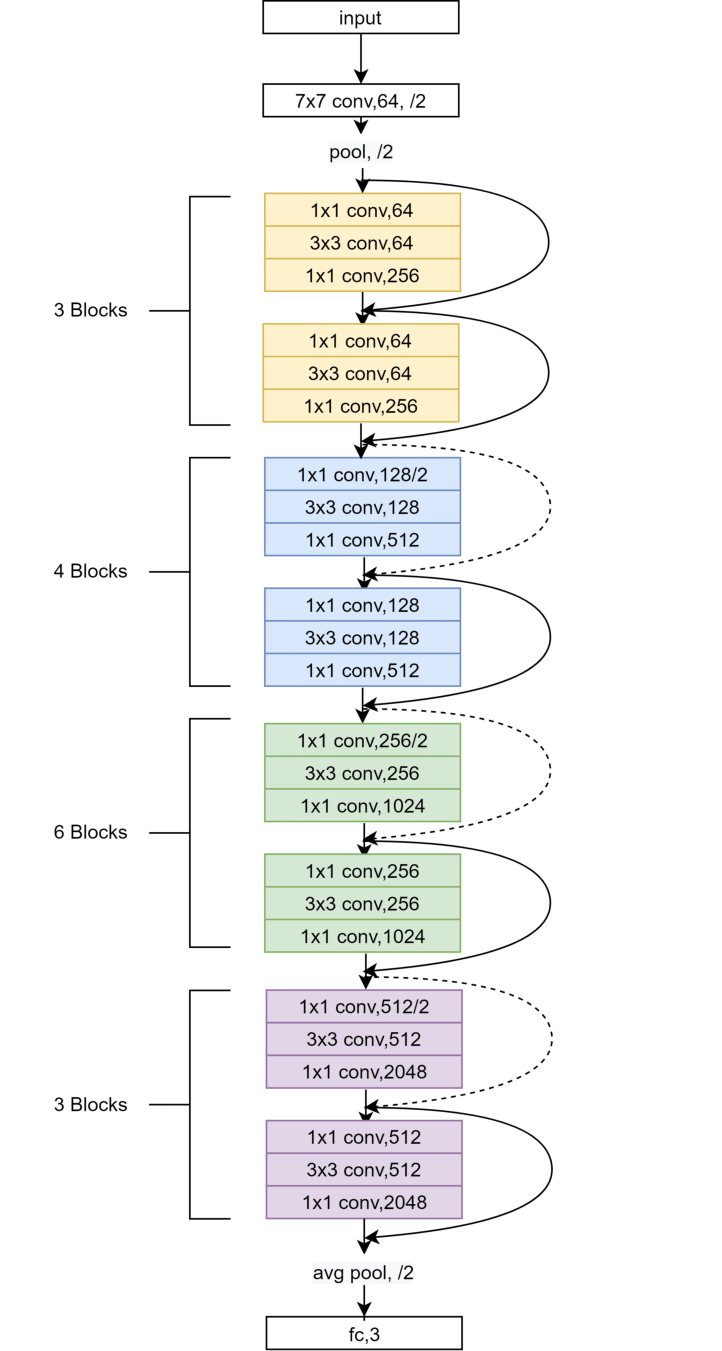

Image Processing:

Resizing to 224×224, converting to tensor, and normalizing with mean [0.485, 0.456, 0.406] and std [0.229, 0.224, 0.225]

Test Data: Using the same processing as the non-augmented training data (i.e., no augmentation)


Evaluation Metrics:

Precision

Recall

F1 Score

Accuracy


Evaluating model without augmentation...

Precision: 0.2500, Recall: 0.5000, F1: 0.3333, Accuracy: 0.5000

Evaluating model with augmentation...

Precision: 0.7381, Recall: 0.6786, F1: 0.6571, Accuracy: 0.6786

We observe good results after data augmentations.

Without Augmentation: High recall (0.5) but poor precision (0.25) suggests the model is predicting too many false positives, leading to weak classification.

With Augmentation: Better precision (0.7381) and F1-score (0.6571) indicate the model learns more robust features and generalizes better.

Accuracy Increase (50% → 67.86%) shows augmentation helps the model differentiate classes more effectively.

Augmentation introduces variations, reducing overfitting and making the model more adaptable to unseen and realtime data.
